In [4]:
#pip install matplotlib


In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/sharanbalakrishnan/Desktop/InternProj/data/realme_results.csv')

In [3]:
df1 = df.copy(deep = True)


In [4]:
df1 = df1[df1['Model'] != 'Model']

df1 = df1.iloc[: , df1.columns!='Expandable']

In [5]:
df1['Brand'] = df1['Model'].str.split().str[0]

In [6]:
df1['Brand'] = df1['Brand'].str.lower().replace({'mi3':'Mi', 'mi4':'Mi', 'mi':'Mi'})


In [29]:
df1['Color'] = df1['Model'].str.extract(r'\((.*?)\)')[0].str.split().str[-1].str.lower()


In [7]:
import re

colors = ['White', 'Black', 'Grey', 'Blue', 'Purple', 'Gold', 'Silver', 'Orange', 'Pearl', 'Cream', 'Carbon', 'Green', 'Yellow']

def extract_color(string):
    pattern = '|'.join(colors)
    match = re.search(pattern, string, flags=re.IGNORECASE)
    if match:
        return match.group(0)
    else:
        return None

# Example usage:
df1['Color'] = df1['Model'].apply(extract_color)


In [8]:
# Extract Display Size
df1["Display_Size"] = df1["Display"].str.extract(r'(\d+\.\d+)\s*inch', expand=False)

# Extract Display Type
#df1["Display_Type"] = df1["Display"].str.extract(r'\s(.+)\sDisplay', expand=False)

#df1["Display_Type"] = df1["Display"].apply(lambda x: x.split("Display")[0].strip())

df1['Display_Type'] = df1['Display'].str.extract(r'(\S+)\s*Display')

In [9]:
df1 = df1.drop_duplicates()


In [10]:
df1['Brand'].unique()

array(['realme', 'redmi', 'xiaomi', 'Mi', '11', 'note', '�9a', 'apple',
       'google', 'oneplus', 'vivo', 'oppo'], dtype=object)

In [23]:
df1[df1['Brand'] == '�9a']

Model        Ram    Storage   
673  �9A (Midnight Black, 32 GB)  3 GB RAM   32 GB ROM  \

                          Display            Camera           Battery   Price   
673  16.59 cm (6.53 inch) Display  13MP Rear Camera  5000 mAh Battery  ₹9,499  \

    Brand  
673   �9a

In [21]:
df1[df1['Brand'] == 'note']

Model        Ram    Storage   
665  Note 11 PRO Plus 5G (Stealth Black, 256 GB)  8 GB RAM   256 GB RO  \

                          Display             Camera           Battery   
665  16.94 cm (6.67 inch) Display  108MP Rear Camera  5000 mAh Battery  \

       Price Brand  
665  ₹24,450  note

In [31]:
#df1 = df1.drop(index=df1[(df1['Brand'] == 'note') | (df1['Brand'] == '�9a')].index)

df1 = df1.drop(index = df1[(df1['Display_Type'] == 'inch)') | (df1['Display_Type'] == 'NA')].index)

#df1 = df1.drop(index = df1[(df1['Front_Cam'] == '0')].index)

In [12]:
#df1['Rear_cam'] = df1['Camera'].apply(lambda x: x.split(' + ')[1] if ' + ' in x else '')


#df1['Rear_cam'] = df1['Rear_cam'].apply(lambda x: x.split(' ')[0])


#df1['Rear_cam'] = df1['Rear_cam'].str.replace('MP', '')

#df1['Rear_Cam'] = df1['Camera'].str.extract('(\d{2})MP')

#df1['Front_Cam'] = df1['Camera'].str.split('|').str[1].str.extract('(\d)MP')

df1['Front_Cam'] = df1['Camera'].str.split('|').str[1].str.extract('(\d+)(?=MP)')

df1['Rear_Cam'] = df1['Camera'].str.extract('^(\d+)MP')

# print resulting dataframe

#df1 = df1.drop(columns = ['Rear_Cam'])


In [13]:
df1

Model        Ram    Storage   
0               realme C33 (Aqua Blue, 64 GB)  4 GB RAM   64 GB ROM  \
1       realme Narzo 50 (Speed Black, 128 GB)  6 GB RAM   128 GB RO   
2     realme 10 Pro+ 5G (Nebula Blue, 128 GB)  8 GB RAM   128 GB RO   
3     realme 10 Pro+ 5G (Nebula Blue, 256 GB)  8 GB RAM   256 GB RO   
4     realme 10 Pro+ 5G (Dark Matter, 128 GB)  8 GB RAM   128 GB RO   
...                                       ...        ...        ...   
1845          OPPO F19 (Space Silver, 128 GB)  6 GB RAM   128 GB RO   
1846    REDMI 9i Sport (Metallic Blue, 64 GB)  4 GB RAM   64 GB ROM   
1847           vivo T1 44W (Ice Dawn, 128 GB)  8 GB RAM   128 GB RO   
1848      vivo V21 5G (Sunset Dazzle, 256 GB)  8 GB RAM   256 GB RO   
1849          vivo V21 5G (Dusk Blue, 256 GB)  8 GB RAM   256 GB RO   

                                           Display   
0                  16.51 cm (6.5 inch) HD+ Display  \
1             16.76 cm (6.6 inch) Full HD+ Display   
2             17.02 cm (6.7 inch) Full HD+ Display   
3             17.02 cm (6.7 inch) Full HD+ Display   
4             17.02 cm (6.7 inch) Full HD+ Display   
...                                            ...   
1845         16.33 cm (6.43 inch) Full HD+ Display   
1846              16.59 cm (6.53 inch) HD+ Display   
1847  16.36 cm (6.44 inch) Full HD+ AMOLED Display   
1848         16.36 cm (6.44 inch) Full HD+ Display   
1849         16.36 cm (6.44 inch) Full HD+ Display   

                                     Camera                           Battery   
0           50MP + 0.3MP | 5MP Front Camera      5000 mAh Lithium Ion Battery  \
1      50MP + 2MP + 2MP | 16MP Front Camera  5000 mAh Lithium Polymer Battery   
2     108MP + 8MP + 2MP | 16MP Front Camera                  5000 mAh Battery   
3     108MP + 8MP + 2MP | 16MP Front Camera                  5000 mAh Battery   
4     108MP + 8MP + 2MP | 16MP Front Camera                  5000 mAh Battery   
...                                     ...                               ...   
1845   48MP + 2MP + 2MP | 16MP Front Camera                  5000 mAh Battery   
1846    13MP Rear Camera | 5MP Front Camera       5000 mAh Li-Polymer Battery   
1847   50MP + 2MP + 2MP | 16MP Front Camera          5000 mAh Lithium Battery   
1848   64MP + 8MP + 2MP | 44MP Front Camera      4000 mAh Lithium-ion Battery   
1849   64MP + 8MP + 2MP | 44MP Front Camera      4000 mAh Lithium-ion Battery   

        Price   Brand   Color Display_Size Display_Type Front_Cam Rear_Cam  
0      ₹9,999  realme    Blue          6.5          HD+         5       50  
1     ₹13,499  realme   Black          6.6          HD+        16       50  
2     ₹25,999  realme    Blue          6.7          HD+        16      108  
3     ₹27,999  realme    Blue          6.7          HD+        16      108  
4     ₹25,999  realme    None          6.7          HD+        16      108  
...       ...     ...     ...          ...          ...       ...      ...  
1845  ₹14,990    oppo  Silver         6.43          HD+        16       48  
1846   ₹7,699   redmi    Blue         6.53          HD+         5       13  
1847  ₹17,999    vivo    None         6.44       AMOLED        16       50  
1848  ₹30,990    vivo    None         6.44          HD+        44       64  
1849  ₹30,990    vivo    Blue         6.44          HD+        44       64  

[1582 rows x 13 columns]

In [16]:
df1['Display_Size'] = df1['Display_Size'].fillna(method='ffill')


In [17]:
df1

Model        Ram    Storage   
0               realme C33 (Aqua Blue, 64 GB)  4 GB RAM   64 GB ROM  \
1       realme Narzo 50 (Speed Black, 128 GB)  6 GB RAM   128 GB RO   
2     realme 10 Pro+ 5G (Nebula Blue, 128 GB)  8 GB RAM   128 GB RO   
3     realme 10 Pro+ 5G (Nebula Blue, 256 GB)  8 GB RAM   256 GB RO   
4     realme 10 Pro+ 5G (Dark Matter, 128 GB)  8 GB RAM   128 GB RO   
...                                       ...        ...        ...   
1845          OPPO F19 (Space Silver, 128 GB)  6 GB RAM   128 GB RO   
1846    REDMI 9i Sport (Metallic Blue, 64 GB)  4 GB RAM   64 GB ROM   
1847           vivo T1 44W (Ice Dawn, 128 GB)  8 GB RAM   128 GB RO   
1848      vivo V21 5G (Sunset Dazzle, 256 GB)  8 GB RAM   256 GB RO   
1849          vivo V21 5G (Dusk Blue, 256 GB)  8 GB RAM   256 GB RO   

                                           Display   
0                  16.51 cm (6.5 inch) HD+ Display  \
1             16.76 cm (6.6 inch) Full HD+ Display   
2             17.02 cm (6.7 inch) Full HD+ Display   
3             17.02 cm (6.7 inch) Full HD+ Display   
4             17.02 cm (6.7 inch) Full HD+ Display   
...                                            ...   
1845         16.33 cm (6.43 inch) Full HD+ Display   
1846              16.59 cm (6.53 inch) HD+ Display   
1847  16.36 cm (6.44 inch) Full HD+ AMOLED Display   
1848         16.36 cm (6.44 inch) Full HD+ Display   
1849         16.36 cm (6.44 inch) Full HD+ Display   

                                     Camera                           Battery   
0           50MP + 0.3MP | 5MP Front Camera      5000 mAh Lithium Ion Battery  \
1      50MP + 2MP + 2MP | 16MP Front Camera  5000 mAh Lithium Polymer Battery   
2     108MP + 8MP + 2MP | 16MP Front Camera                  5000 mAh Battery   
3     108MP + 8MP + 2MP | 16MP Front Camera                  5000 mAh Battery   
4     108MP + 8MP + 2MP | 16MP Front Camera                  5000 mAh Battery   
...                                     ...                               ...   
1845   48MP + 2MP + 2MP | 16MP Front Camera                  5000 mAh Battery   
1846    13MP Rear Camera | 5MP Front Camera       5000 mAh Li-Polymer Battery   
1847   50MP + 2MP + 2MP | 16MP Front Camera          5000 mAh Lithium Battery   
1848   64MP + 8MP + 2MP | 44MP Front Camera      4000 mAh Lithium-ion Battery   
1849   64MP + 8MP + 2MP | 44MP Front Camera      4000 mAh Lithium-ion Battery   

        Price   Brand   Color Display_Size Display_Type Front_Cam Rear_Cam  
0      ₹9,999  realme    Blue          6.5          HD+         5       50  
1     ₹13,499  realme   Black          6.6          HD+        16       50  
2     ₹25,999  realme    Blue          6.7          HD+        16      108  
3     ₹27,999  realme    Blue          6.7          HD+        16      108  
4     ₹25,999  realme    None          6.7          HD+        16      108  
...       ...     ...     ...          ...          ...       ...      ...  
1845  ₹14,990    oppo  Silver         6.43          HD+        16       48  
1846   ₹7,699   redmi    Blue         6.53          HD+         5       13  
1847  ₹17,999    vivo    None         6.44       AMOLED        16       50  
1848  ₹30,990    vivo    None         6.44          HD+        44       64  
1849  ₹30,990    vivo    Blue         6.44          HD+        44       64  

[1582 rows x 13 columns]

In [19]:
df1.dropna(axis = 0 , inplace = True)

In [32]:
df2 = df1[['Ram' , 'Storage' , 'Brand' , 'Color' , 'Display_Size' , 'Display_Type' , 'Front_Cam' , 'Rear_Cam' , 'Price']]

In [33]:
df2

Ram    Storage   Brand   Color Display_Size Display_Type   
0      4 GB RAM   64 GB ROM  realme    Blue          6.5          HD+  \
1      6 GB RAM   128 GB RO  realme   Black          6.6          HD+   
2      8 GB RAM   128 GB RO  realme    Blue          6.7          HD+   
3      8 GB RAM   256 GB RO  realme    Blue          6.7          HD+   
5      4 GB RAM   64 GB ROM  realme   Black          6.6          HD+   
...          ...        ...     ...     ...          ...          ...   
1838   4 GB RAM   64 GB ROM   redmi    Grey         6.53          HD+   
1843  12 GB RAM   256 GB RO    vivo   Black         6.43       AMOLED   
1845   6 GB RAM   128 GB RO    oppo  Silver         6.43          HD+   
1846   4 GB RAM   64 GB ROM   redmi    Blue         6.53          HD+   
1849   8 GB RAM   256 GB RO    vivo    Blue         6.44          HD+   

     Front_Cam Rear_Cam    Price  
0            5       50   ₹9,999  
1           16       50  ₹13,499  
2           16      108  ₹25,999  
3           16      108  ₹27,999  
5            8       50  ₹14,999  
...        ...      ...      ...  
1838        13       48  ₹14,999  
1843        50       50  ₹36,999  
1845        16       48  ₹14,990  
1846         5       13   ₹7,699  
1849        44       64  ₹30,990  

[1042 rows x 9 columns]

In [45]:
df3 = df2[['Ram' , 'Storage' , 'Color' , 'Display_Size' , 'Display_Type' , 'Front_Cam' , 'Rear_Cam' , 'Price']]

In [46]:
df3

Ram    Storage   Color Display_Size Display_Type Front_Cam   
0      4 GB RAM   64 GB ROM    Blue          6.5          HD+         5  \
1      6 GB RAM   128 GB RO   Black          6.6          HD+        16   
2      8 GB RAM   128 GB RO    Blue          6.7          HD+        16   
3      8 GB RAM   256 GB RO    Blue          6.7          HD+        16   
5      4 GB RAM   64 GB ROM   Black          6.6          HD+         8   
...          ...        ...     ...          ...          ...       ...   
1838   4 GB RAM   64 GB ROM    Grey         6.53          HD+        13   
1843  12 GB RAM   256 GB RO   Black         6.43       AMOLED        50   
1845   6 GB RAM   128 GB RO  Silver         6.43          HD+        16   
1846   4 GB RAM   64 GB ROM    Blue         6.53          HD+         5   
1849   8 GB RAM   256 GB RO    Blue         6.44          HD+        44   

     Rear_Cam    Price  
0          50   ₹9,999  
1          50  ₹13,499  
2         108  ₹25,999  
3         108  ₹27,999  
5          50  ₹14,999  
...       ...      ...  
1838       48  ₹14,999  
1843       50  ₹36,999  
1845       48  ₹14,990  
1846       13   ₹7,699  
1849       64  ₹30,990  

[1042 rows x 8 columns]

In [50]:
df3['ROM'] = df3['Storage'].str.extract('(\d+)\s*(?:GB|MB)?')


In [52]:
df4 = df3[['RAM' , 'ROM' , 'Color','Display_Type' , 'Display_Size' , 'Front_Cam' , 'Rear_Cam' , 'Price']]

In [53]:
df4

RAM  ROM   Color Display_Type Display_Size Front_Cam Rear_Cam    Price
0      4   64    Blue          HD+          6.5         5       50   ₹9,999
1      6  128   Black          HD+          6.6        16       50  ₹13,499
2      8  128    Blue          HD+          6.7        16      108  ₹25,999
3      8  256    Blue          HD+          6.7        16      108  ₹27,999
5      4   64   Black          HD+          6.6         8       50  ₹14,999
...   ..  ...     ...          ...          ...       ...      ...      ...
1838   4   64    Grey          HD+         6.53        13       48  ₹14,999
1843  12  256   Black       AMOLED         6.43        50       50  ₹36,999
1845   6  128  Silver          HD+         6.43        16       48  ₹14,990
1846   4   64    Blue          HD+         6.53         5       13   ₹7,699
1849   8  256    Blue          HD+         6.44        44       64  ₹30,990

[1042 rows x 8 columns]

In [55]:
df4.columns

Index(['RAM', 'ROM', 'Color', 'Display_Type', 'Display_Size', 'Front_Cam',
       'Rear_Cam', 'Price'],
      dtype='object')

In [66]:
df4['Color'] = df4['Color'].replace(['WHITE', 'White', 'Cream'], 'White')


/tmp/ipykernel_26973/575600545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Color'] = df4['Color'].replace(['WHITE', 'White', 'Cream'], 'White')


In [68]:
print(df4['RAM'].unique())

print(df4['ROM'].unique())

print(df4['Color'].unique())

print(df4['Display_Type'].unique())



['4' '6' '8' '2' '3' '12' '1' '128' '64' '256' '512' '32' '16']
['64' '128' '256' '32' '16' '8' '512' '1']
['Blue' 'Black' 'Gold' 'Grey' 'Green' 'White' 'Silver' 'Yellow' 'Purple'
 'Orange' 'Pearl' 'Carbon']
['HD+' 'AMOLED' 'HD' 'XDR' 'Retina']


In [76]:
df4['Display_Size'] = df4['Display_Size'].astype(float)

/tmp/ipykernel_26973/2024817432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Display_Size'] = df4['Display_Size'].astype(float)


In [79]:
df4['Display_Size'].value_counts()

Display_Size
6.500    133
6.100     83
6.700     74
6.670     62
4.700     53
6.430     47
6.300     43
5.500     42
6.400     41
6.520     41
6.530     39
5.990     38
6.510     37
6.600     33
6.560     31
6.220     27
6.440     23
6.580     19
5.400     19
6.620     17
5.800     16
6.550     14
6.780     14
5.450     13
6.260     13
6.200     10
6.390      9
5.700      8
6.570      7
5.840      6
5.150      5
5.488      4
6.380      4
6.088      3
6.080      3
6.590      3
6.800      2
6.350      2
6.720      1
5.200      1
6.280      1
6.410      1
Name: count, dtype: int64

In [81]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1042 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RAM           1042 non-null   object 
 1   ROM           1042 non-null   object 
 2   Color         1042 non-null   object 
 3   Display_Type  1042 non-null   object 
 4   Display_Size  1042 non-null   float64
 5   Front_Cam     1042 non-null   object 
 6   Rear_Cam      1042 non-null   object 
 7   Price         1042 non-null   object 
dtypes: float64(1), object(7)
memory usage: 73.3+ KB


In [92]:
#df4['Front_Cam'] = df4['Front_Cam'].astype(float)

#df4['Rear_Cam'] = df4['Rear_Cam'].astype(float)

#df4['Price'] = df4['Price'].str.replace('₹', '').str.replace(',', '')

#df4['Price'] = df4['Price'].astype(float)

/tmp/ipykernel_26973/1211516729.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Price'] = df4['Price'].astype(float)


In [ ]:
d

In [105]:
import numpy as np

# calculate IQR and number of data points
q1, q3 = np.percentile(df4['Rear_Cam'], [25, 75])
iqr = q3 - q1
n = len(df4['Rear_Cam'])

# calculate bin width and number of bins
bin_width = 2 * iqr / (n ** (1/3))
num_bins = round((df4['Rear_Cam'].max() - df4['Rear_Cam'].min()) / bin_width)


In [108]:
num_bins

26

In [110]:
df4['Front_Cam'].describe()

count    1042.000000
mean       13.300384
std         8.733595
min         2.000000
25%         7.000000
50%        12.000000
75%        16.000000
max        50.000000
Name: Front_Cam, dtype: float64

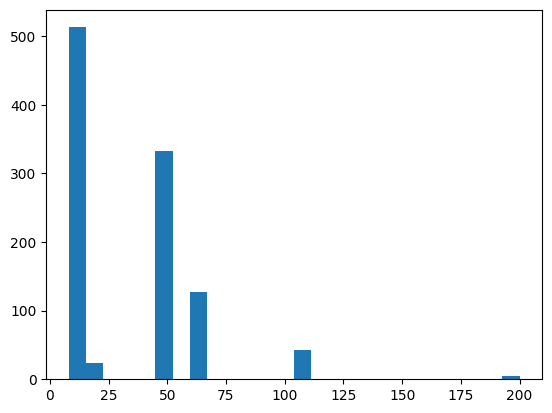

In [107]:
plt.hist(df4['Rear_Cam'], bins=num_bins)
plt.show()


In [93]:
df4['Price'].describe()

count      1042.000000
mean      34244.827255
std       36143.247998
min        5299.000000
25%       12359.250000
50%       17999.000000
75%       36990.000000
max      178099.000000
Name: Price, dtype: float64

In [122]:
#df4 = df4.drop(index = df4[(df4['RAM'] == '1') | (df4['ROM'] == '1')].index)


df4 = df4.drop(index = (df4['ROM'] == '8').index)

In [123]:
print(df4['RAM'].unique())

print(df4['ROM'].unique())

print(df4['Color'].unique())

print(df4['Display_Type'].unique())



[]
[]
[]
[]


In [124]:
df4

Empty DataFrame
Columns: [RAM, ROM, Color, Display_Type, Display_Size, Front_Cam, Rear_Cam, Price, Display_Category, price]
Index: []

In [119]:
df4[df4['ROM'] == '8']

RAM ROM   Color Display_Type  Display_Size  Front_Cam  Rear_Cam    Price   
1109   8   8    Blue       Retina           5.4        2.0       8.0  14999.0  \
1110   8   8   White       Retina           5.4        2.0       8.0  14999.0   
1154   8   8  Yellow       Retina           4.7        2.0       8.0  37500.0   

     Display_Category                   price  
1109     (5.12, 5.54]  (13336.209, 17354.814]  
1110     (5.12, 5.54]  (13336.209, 17354.814]  
1154    (4.698, 5.12]  (37447.837, 41466.442]

In [97]:
#df4['Display_Category'] = pd.cut(df4['Display_Size'], bins=5)

df4['price'] = pd.cut(df4['Price'], bins=43)



In [99]:
df4.to_csv('df4.csv')

In [114]:
df4[df4['RAM'] == '1']

RAM ROM   Color Display_Type  Display_Size  Front_Cam  Rear_Cam   
400    1   8   Black           HD          6.70        5.0       8.0  \
403    1  16    Blue           HD          6.50        5.0       8.0   
473    1  16   Black           HD          6.67        5.0       8.0   
475    1   8    Blue           HD          6.30        5.0       8.0   
884    1   1   Green          XDR          6.70       12.0      12.0   
890    1   1  Silver          XDR          6.70       12.0      12.0   
891    1   1    Blue          XDR          6.10       12.0      12.0   
927    1   1    Gold          XDR          6.70       12.0      12.0   
937    1   1  Silver          XDR          6.10       12.0      48.0   
938    1   1   Green          XDR          6.10       12.0      12.0   
961    1   1   Black          XDR          6.10       12.0      48.0   
965    1   1    Blue          XDR          6.70       12.0      12.0   
966    1   1    Gold          XDR          6.10       12.0      12.0   
974    1   1  Silver          XDR          6.70       12.0      48.0   
1138   1   1  Purple          XDR          6.70       12.0      48.0   
1213   1   1    Gold          XDR          6.70       12.0      48.0   

         Price Display_Category                     price  
400     5999.0      (6.38, 6.8]        (5126.2, 9317.605]  
403     5999.0      (6.38, 6.8]        (5126.2, 9317.605]  
473     5999.0      (6.38, 6.8]        (5126.2, 9317.605]  
475     5999.0     (5.96, 6.38]        (5126.2, 9317.605]  
884   155999.0      (6.38, 6.8]  (153987.372, 158005.977]  
890   155999.0      (6.38, 6.8]  (153987.372, 158005.977]  
891   144999.0     (5.96, 6.38]  (141931.558, 145950.163]  
927   155999.0      (6.38, 6.8]  (153987.372, 158005.977]  
937   173099.0     (5.96, 6.38]  (170061.791, 174080.395]  
938   144999.0     (5.96, 6.38]  (141931.558, 145950.163]  
961   173099.0     (5.96, 6.38]  (170061.791, 174080.395]  
965   155999.0      (6.38, 6.8]  (153987.372, 158005.977]  
966   144999.0     (5.96, 6.38]  (141931.558, 145950.163]  
974   178099.0      (6.38, 6.8]    (174080.395, 178099.0]  
1138  178099.0      (6.38, 6.8]    (174080.395, 178099.0]  
1213  178099.0      (6.38, 6.8]    (174080.395, 178099.0]

In [101]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1042 entries, 0 to 1849
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   RAM               1042 non-null   object  
 1   ROM               1042 non-null   object  
 2   Color             1042 non-null   object  
 3   Display_Type      1042 non-null   object  
 4   Display_Size      1042 non-null   float64 
 5   Front_Cam         1042 non-null   float64 
 6   Rear_Cam          1042 non-null   float64 
 7   Price             1042 non-null   float64 
 8   Display_Category  1042 non-null   category
 9   price             1042 non-null   category
dtypes: category(2), float64(4), object(4)
memory usage: 77.3+ KB


In [47]:
print(df3['Ram'].unique())

print(df3['Storage'].unique())

print(df3['Color'].unique())

['4 GB RAM ' '6 GB RAM ' '8 GB RAM ' '2 GB RAM ' '3 GB RAM ' '12 GB RAM '
 '1 GB RAM ' '128 GB RO' '64 GB RO' '256 GB RO' '512 GB RO' '1 TB RO'
 '32 GB RO' '16 GB RO' '8 GB RO']
['64 GB ROM' '128 GB RO' '256 GB RO' '32 GB ROM' '16 GB ROM' '8 GB ROM'
 '128 GB ROM' '256 GB ROM' '512 GB ROM' '1 TB ROM']
['Blue' 'Black' 'Gold' 'Grey' 'Green' 'White' 'Silver' 'Yellow' 'Purple'
 'Orange' 'Pearl' 'Carbon' 'WHITE' 'Cream']


In [44]:
df2.to_csv('df2.csv')

In [43]:
df1.to_csv('df1.csv')

<Axes: xlabel='Rear_Cam'>

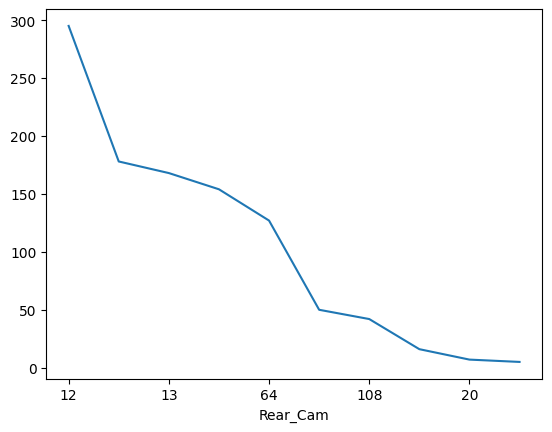

In [38]:
df2['Rear_Cam'].value_counts().plot()

<Axes: xlabel='Front_Cam'>

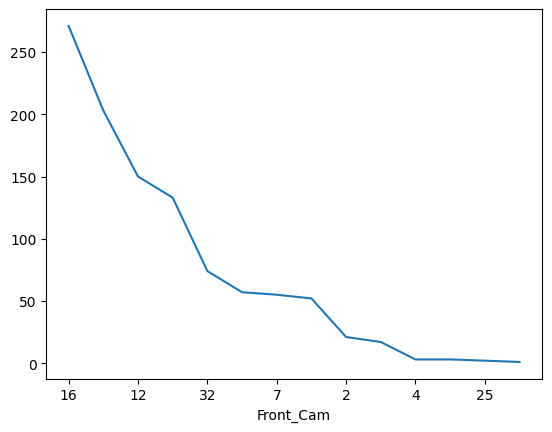

In [37]:
df2['Front_Cam'].value_counts().plot()

<Axes: xlabel='Display_Size'>

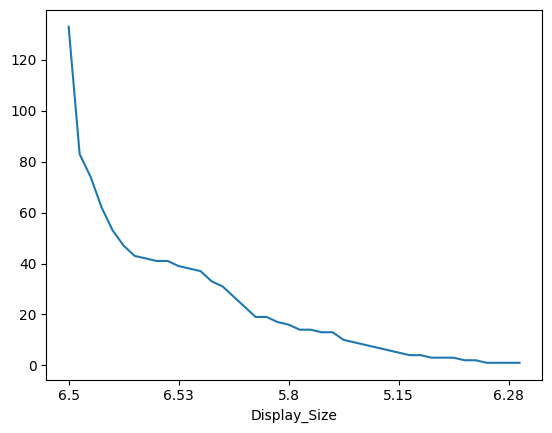

In [36]:
df2['Display_Size'].value_counts().plot()

<Axes: xlabel='Color'>

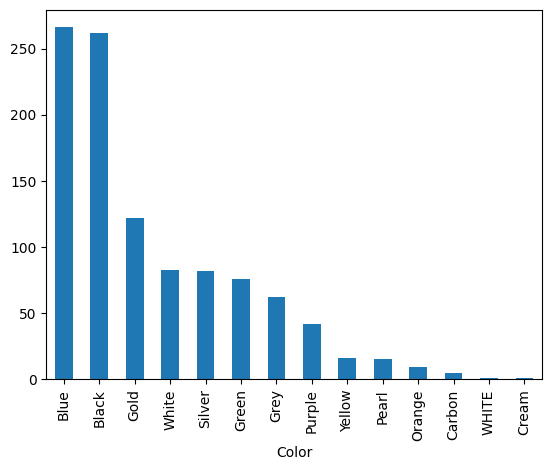

In [35]:
df2['Color'].value_counts().plot(kind = 'bar')

In [22]:
df1.columns

Index(['Model', 'Ram', 'Storage', 'Display', 'Camera', 'Battery', 'Price',
       'Brand', 'Color', 'Display_Size', 'Display_Type', 'Front_Cam',
       'Rear_Cam'],
      dtype='object')

In [32]:
df1 = df1.iloc[: , df1.columns!='Color']

In [98]:
df1['Battery'].unique()

array(['5000 mAh Lithium Ion Battery', '5000 mAh Lithium Polymer Battery',
       '5000 mAh Battery', '6000 mAh Battery',
       '5000 mAh Lithium ion Battery', '4500 mAh Li-ion Battery',
       '5000 mAh LiPo Battery', '4500 mAh Lithium Ion Battery',
       '5000 mAh Li-ion Battery', '4300 mAh Battery',
       '3500 mAh Li-ion Battery', '6000 mAh Lithium-ion Battery',
       '4500 mAh Battery', '4000 mAh Battery',
       '5000 mAh Lithium-ion Battery', '4230 mAh Battery',
       '4200 mAh Battery', '4230 mAh Li-ion Battery', '3765 mAh Battery',
       '4310 mAh Battery', '5000 mAH Battery',
       '4500 mAh Lithium-ion Battery', '4045 mAh Battery',
       '4035 mAh Battery', '3000 mAh Li Polymer Battery',
       '4600 mAh Battery', '4500 mAh Li-Polymer Battery',
       '5160 mAh Li-Polymer Battery', '4000 mAh Li-Polymer Battery',
       '3080 mAh Li Polymer Battery', '3000 mAh Lithium-polymer Battery',
       '4250 mAh Li-Polymer Battery', '4000 mAh Li Polymer Battery',
       '4000 m

In [55]:
df[['Brand', 'Model', 'Color']] = df['Model'].str.extract(r'(\b\w+\b)\s+(\w+)\s+\(([\w\s]+),')


In [43]:
df1.dropna(axis = 0 , inplace = True)

In [55]:
df1['Display_Type'].unique()

array(['HD+', 'AMOLED', 'inch)', 'HD', 'XDR', 'Retina', 'NA'],
      dtype=object)

In [58]:
df['Model'].value_counts()

Model
5G       258
Pro      223
Max       83
Plus      56
7         40
        ... 
Y75        1
1S         1
5g         1
PRIME      1
Y20        1
Name: count, Length: 187, dtype: int64

In [127]:
df3

Ram    Storage   Color Display_Size Display_Type Front_Cam   
0      4 GB RAM   64 GB ROM    Blue          6.5          HD+         5  \
1      6 GB RAM   128 GB RO   Black          6.6          HD+        16   
2      8 GB RAM   128 GB RO    Blue          6.7          HD+        16   
3      8 GB RAM   256 GB RO    Blue          6.7          HD+        16   
5      4 GB RAM   64 GB ROM   Black          6.6          HD+         8   
...          ...        ...     ...          ...          ...       ...   
1838   4 GB RAM   64 GB ROM    Grey         6.53          HD+        13   
1843  12 GB RAM   256 GB RO   Black         6.43       AMOLED        50   
1845   6 GB RAM   128 GB RO  Silver         6.43          HD+        16   
1846   4 GB RAM   64 GB ROM    Blue         6.53          HD+         5   
1849   8 GB RAM   256 GB RO    Blue         6.44          HD+        44   

     Rear_Cam    Price RAM  ROM  
0          50   ₹9,999   4   64  
1          50  ₹13,499   6  128  
2         108  ₹25,999   8  128  
3         108  ₹27,999   8  256  
5          50  ₹14,999   4   64  
...       ...      ...  ..  ...  
1838       48  ₹14,999   4   64  
1843       50  ₹36,999  12  256  
1845       48  ₹14,990   6  128  
1846       13   ₹7,699   4   64  
1849       64  ₹30,990   8  256  

[1042 rows x 10 columns]